# Importing dependencies and creating initial dataframe

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Finding and removing repeat values

In [2]:
# Checking to see if any mouse is referenced more times than any other
mouse_df['Mouse ID'].value_counts()

g989    13
o562    10
y865    10
i635    10
p189    10
        ..
n482     1
f932     1
x336     1
v199     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Mouse g989 has several repeated timepoints
mouse_df.loc[mouse_df['Mouse ID'] == 'g989', :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Creating a cleaned dataframe by removing mouse g989
mouse_cleaned = mouse_df.loc[mouse_df['Mouse ID'] != 'g989', :]

## Creating summary table by drug treatment

In [5]:
# Creating a .groupby object by treatment
drug_group = mouse_cleaned.groupby('Drug Regimen')

# Creating aggregated variables for summary dataframe
tumor_mean = drug_group['Tumor Volume (mm3)'].mean()
tumor_median = drug_group['Tumor Volume (mm3)'].median()
tumor_variance = drug_group['Tumor Volume (mm3)'].var()
tumor_std = drug_group['Tumor Volume (mm3)'].std()

# Creating a randomized sample to find standard error
tumor_sample = mouse_cleaned.sample(25)
tumor_sample_group = tumor_sample.groupby('Drug Regimen')
tumor_sem = st.sem(tumor_sample['Tumor Volume (mm3)'])

# Building summary dataframe from variables
drug_summary_table = pd.DataFrame(
{'Mean': tumor_mean, 
 'Median': tumor_median, 
 'Variance': tumor_variance, 
 'Standard Deviation': tumor_std, 
 'Standard Error': tumor_sem})

# Removing the index label and sorting by variance
drug_summary_table.index.name = None
drug_summary_table.sort_values(by=['Variance'])

,Mean,Median,Variance,Standard Deviation,Standard Error
Ramicane,40.216745,40.673236,23.486704,4.846308,2.564282
Capomulin,40.675741,41.557809,24.947764,4.994774,2.564282
Ceftamin,52.591172,51.776157,39.290177,6.268188,2.564282
Infubinol,52.884795,51.820584,43.128684,6.567243,2.564282
Propriva,52.320930,50.446266,43.852013,6.622085,2.564282
Zoniferol,53.236507,51.818479,48.533355,6.966589,2.564282
Stelasyn,54.233149,52.431737,59.450562,7.710419,2.564282
Placebo,54.033581,52.288934,61.168083,7.821003,2.564282
Naftisol,54.331565,52.509285,66.173479,8.134708,2.564282
Ketapril,55.235638,53.698743,68.553577,8.279709,2.564282


## Creating bar charts (by drug treatment)

In [6]:
# Creating summary count table by treatment
drug_counts = drug_group['Mouse ID'].count()
drug_counts_sorted = drug_counts.sort_values(ascending=False)
drug_counts_sorted

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Mouse ID, dtype: int64

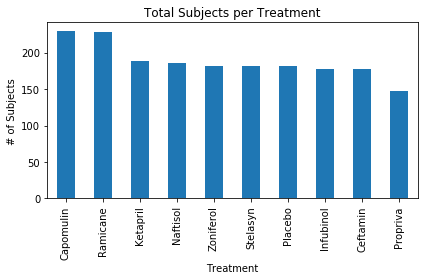

In [7]:
# Using built-in Pandas bar plot on summary count table
drug_counts_sorted.plot(kind="bar")
plt.xlabel('Treatment')
plt.ylabel('# of Subjects')
plt.title('Total Subjects per Treatment')
plt.tight_layout()
plt.show()

In [8]:
# Creating axis variables from Pandas columns for Matplotlib bar plot
x_index = drug_counts_sorted.index
x_axis = [x for x in x_index]

y_axis = [x for x in drug_counts_sorted]

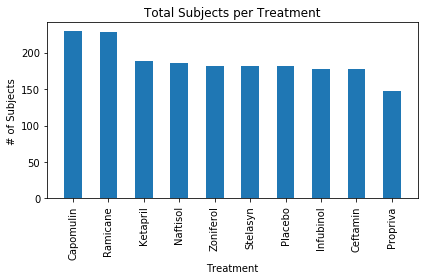

In [9]:
# Building and formatting Matplotlib bar plot
plt.bar(x_axis, y_axis, width=.5)
plt.xlabel('Treatment')
plt.ylabel('# of Subjects')
plt.title('Total Subjects per Treatment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Creating pie charts (by sex)

In [10]:
# Creating summary count table by sex
sex_group = mouse_cleaned.groupby('Sex')
sex_counts = sex_group['Mouse ID'].count()

In [11]:
# Creating variables for labels and values from summary count table
labels = [x for x in sex_counts.index]
pie_values = [x for x in sex_counts]

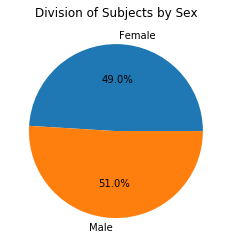

In [12]:
# Building and formatting pie chart using Pandas built-in pie chart
sex_counts.plot.pie(autopct='%1.1f%%')
plt.title('Division of Subjects by Sex')
plt.ylabel('')
plt.show()

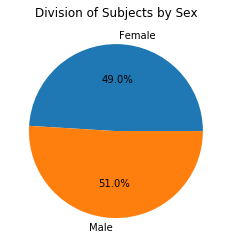

In [13]:
# Building and formatting pie chart using Matplotlib
plt.pie(pie_values, labels=labels, autopct="%1.1f%%")
plt.title('Division of Subjects by Sex')
plt.show()

## Calculating tumor volume across most promising treatments

In [14]:
# Creating .groupby object to organize by treatment and mouse
drug_mouse_group = mouse_cleaned.groupby(['Drug Regimen', 'Mouse ID'])

# Building tumor mass summary dataframe for reference
tumor_mass = pd.DataFrame(drug_mouse_group['Tumor Volume (mm3)'].sum())

# Building individual tumor mass dataframes by treatment
capomulin_tumor_mass = tumor_mass.loc[
['Capomulin']]
ramicane_tumor_mass = tumor_mass.loc[
['Ramicane']]
infubinol_tumor_mass = tumor_mass.loc[
['Infubinol']]
ceftamin_tumor_mass = tumor_mass.loc[
['Ceftamin']]

In [15]:
# Quantitative approach to finding Capomulin outliers
quartiles = capomulin_tumor_mass['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[.25]
uq = quartiles[.75]
iqr = uq - lq

cap_lb = lq-(1.5*iqr)
cap_ub = uq+(1.5*iqr)

# Building a dataframe of all Capomulin outliers
cap_outlier_df = capomulin_tumor_mass.loc[(capomulin_tumor_mass['Tumor Volume (mm3)'] < cap_lb) 
                                      | (capomulin_tumor_mass['Tumor Volume (mm3)'] > cap_ub), :]

# Displaying outliers in a dataframe
cap_outlier_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    f966              182.529864
             r157              183.195878
             w150              124.154476

In [16]:
# Quantitative approach to finding Ramicane outliers
quartiles = ramicane_tumor_mass['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[.25]
uq = quartiles[.75]
iqr = uq - lq

ram_lb = lq-(1.5*iqr)
ram_ub = uq+(1.5*iqr)

# Building a dataframe of all Ramicane outliers
ram_outlier_df = ramicane_tumor_mass.loc[(ramicane_tumor_mass['Tumor Volume (mm3)'] < ram_lb) 
                                      | (ramicane_tumor_mass['Tumor Volume (mm3)'] > ram_ub), :]

# Displaying outliers in a dataframe
ram_outlier_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Ramicane     w678               88.166373
             y449              181.439088

In [17]:
# Quantitative approach to finding Ifubinol outliers
quartiles = infubinol_tumor_mass['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[.25]
uq = quartiles[.75]
iqr = uq - lq

inf_lb = lq-(1.5*iqr)
inf_ub = uq+(1.5*iqr)

# Building a dataframe of all Infubinol outliers
inf_outlier_df = infubinol_tumor_mass.loc[(infubinol_tumor_mass['Tumor Volume (mm3)'] < inf_lb) 
                                      | (infubinol_tumor_mass['Tumor Volume (mm3)'] > inf_ub), :]

# Displaying outliers in a dataframe
inf_outlier_df

,,Tumor Volume (mm3)
Drug Regimen,Mouse ID,


In [18]:
# Quantitative approach to finding Ceftamin outliers
quartiles = ceftamin_tumor_mass['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[.25]
uq = quartiles[.75]
iqr = uq - lq

cef_lb = lq-(1.5*iqr)
cef_ub = uq+(1.5*iqr)

# Building a dataframe of all Ceftamin outliers
cef_outlier_df = ceftamin_tumor_mass.loc[(ceftamin_tumor_mass['Tumor Volume (mm3)'] < cef_lb) 
                                      | (ceftamin_tumor_mass['Tumor Volume (mm3)'] > cef_ub), :]

# Displaying outliers in a dataframe
cef_outlier_df

,,Tumor Volume (mm3)
Drug Regimen,Mouse ID,


## Boxplot

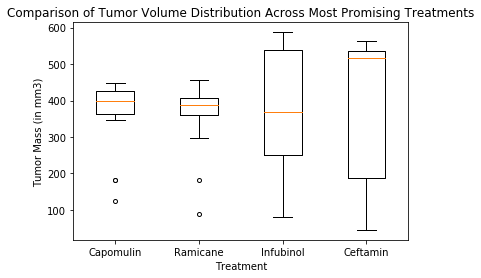

In [19]:
# Creating data, label, and marker variables
box_data = [capomulin_tumor_mass['Tumor Volume (mm3)'], ramicane_tumor_mass['Tumor Volume (mm3)'], 
            infubinol_tumor_mass['Tumor Volume (mm3)'], ceftamin_tumor_mass['Tumor Volume (mm3)']]
tick_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
markers = dict(marker='o', markerfacecolor='white', markersize=4)

# Building and formatting box and whisker plot
fig1, ax1 = plt.subplots()
ax1.boxplot(box_data, flierprops=markers)
ax1.set_xticklabels(tick_labels)
ax1.set_title('Comparison of Tumor Volume Distribution Across Most Promising Treatments')
ax1.set_xlabel('Treatment')
ax1.set_ylabel('Tumor Mass (in mm3)')
plt.show()

## Individual Mouse

In [20]:
# Creating a random sample generator to pick a mouse to be charted
sample_generator = mouse_cleaned.loc[mouse_cleaned['Drug Regimen'] == 'Capomulin', :].sample(1)
sample_generator

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
349,v923,Capomulin,Female,19,21,40,42.151015,2


In [21]:
# Pulling all rows for the sampled mouse out of the master dataframe
sample_mouse = mouse_cleaned.loc[mouse_cleaned['Mouse ID'] == sample_generator.iloc[0,0], :]
sample_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
341,v923,Capomulin,Female,19,21,0,45.000000,0
342,v923,Capomulin,Female,19,21,5,45.704434,0
343,v923,Capomulin,Female,19,21,10,39.848223,0
344,v923,Capomulin,Female,19,21,15,40.457989,0
345,v923,Capomulin,Female,19,21,20,39.648296,0
346,v923,Capomulin,Female,19,21,25,40.156413,1
347,v923,Capomulin,Female,19,21,30,40.752216,2
348,v923,Capomulin,Female,19,21,35,41.439242,2
349,v923,Capomulin,Female,19,21,40,42.151015,2
350,v923,Capomulin,Female,19,21,45,40.658124,2


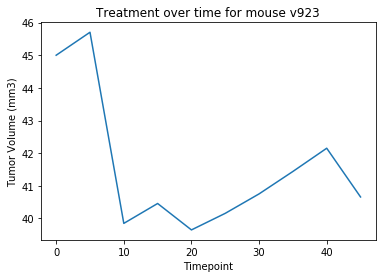

In [22]:
# Building line plot for sampled mouse
plt.plot(sample_mouse['Timepoint'], sample_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Treatment over time for mouse {sample_mouse.iloc[0,0]}")
plt.show()

## Scatterplot

In [23]:
# Creating an exclusive dataframe that only include Capomulin treated mice
capomulin_df = mouse_cleaned.loc[mouse_cleaned['Drug Regimen'] == 'Capomulin', :]

In [24]:
# Grouping mice by weight
weight_to_volume_group = capomulin_df.groupby('Weight (g)')

# Finding the average tumor volume for each weight group
weight_to_volume_df = pd.DataFrame(weight_to_volume_group['Tumor Volume (mm3)'].mean())

# Creating axis variables
weights = weight_to_volume_df.index
volumes = weight_to_volume_df.iloc[:,0]

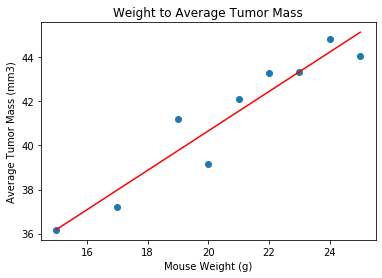

The correlation coefficient is 0.9034966277438606


In [25]:
# Building scatterplot
plt.scatter(weights, volumes)
plt.title('Weight to Average Tumor Mass')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Mass (mm3)')

# Unpacking linear regression returns into tuple
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, volumes)

# Using line slope to create y-axis values for regression line
regress_values = weights * slope + intercept

# Plotting regression line over scatterplot
plt.plot(weights, regress_values, "r-")
plt.show()

# Displaying correlation coefficient
print(f"The correlation coefficient is {rvalue**2}")